In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WeatherIndiaDaily1980-2019.csv')

In [ ]:
df

,STN,WBAN,StationName,Latitude,Longitude,Elevation_m,RecDate,TempMin_C,Tmean_C,TempMax_C,DewPoint_C,WindSpeed_mps,Rain_mm,WBGTmean,WGBTmax
0,420270,99999,SRINAGAR,34.083,74.833,1587.0,1/01/1980,0,0.833333,1.999999166,0.500000835,0,11.93799973,0.677000582,1.598000288
1,420270,99999,SRINAGAR,34.083,74.833,1587.0,2/01/1980,0,0.277778,1.999999166,0.277777791,0,0,0.277777791,1.583110809
2,420270,99999,SRINAGAR,34.083,74.833,1587.0,3/01/1980,-0.999999583,1.222223,5,-0.999999583,0,8.88999939,0.604333758,3.325000286
3,420270,99999,SRINAGAR,34.083,74.833,1587.0,4/01/1980,-2.000000238,0.222223,8.000000954,-2.777777672,0,0,-0.514777422,4.999889374
4,420270,99999,SRINAGAR,34.083,74.833,1587.0,5/01/1980,-2.999999762,-0.388889,6.999999046,-3.222221851,0,0,-1.148222089,4.238111019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123744,423280,99999,JAISALMER,26.900,70.917,231.0,9/07/2017,26.88888931,33.277779,38.5,23.83333397,3.744602442,0,28.625,31.15233421
123745,423280,99999,JAISALMER,26.900,70.917,231.0,10/07/2017,26.61111069,32.000000,39,25.11110878,5.17295599,0,28.52344322,31.90544319
123746,423280,99999,JAISALMER,26.900,70.917,231.0,11/07/2017,26.61111069,31.277779,38,24.66666603,6.060851574,0,27.9873333,31.27766609
123747,423280,99999,JAISALMER,26.900,70.917,231.0,12/07/2017,27.22222138,31.888889,37,24.33333588,4.786914349,0,28.0996685,30.59033585


In [ ]:
df.describe()

,STN,WBAN,Latitude,Longitude,Elevation_m,Tmean_C
count,123749.000000,123749.0,123749.000000,123748.000000,123748.000000,123748.000000
mean,421649.398783,99999.0,29.381409,77.379072,347.992768,23.812327
std,907.179719,0.0,2.048508,6.173607,413.425894,8.102307
min,420270.000000,99999.0,26.899000,70.917000,111.000000,-7.222222
25%,421010.000000,99999.0,28.000000,74.833000,216.000000,17.611111
50%,421650.000000,99999.0,28.583000,75.733002,224.000000,25.111109
75%,421890.000000,99999.0,30.333000,77.199997,234.000000,30.277779
max,423280.000000,99999.0,34.083000,95.016998,1587.000000,42.888886


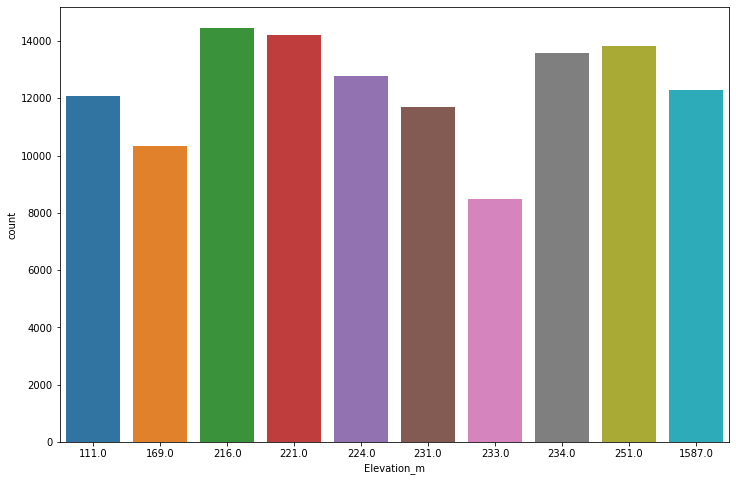

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(df['Elevation_m']);

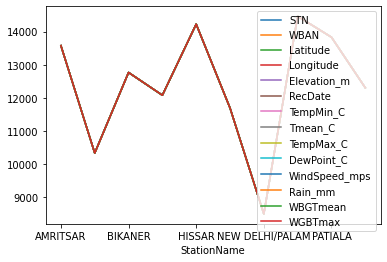

In [ ]:
df.groupby('StationName').count().plot()

In [ ]:
df.groupby('StationName')['TempMin_C'].first()

StationName
AMRITSAR                         5
BAREILLY                        10
BIKANER                         11
DIBRUGARH/MOHANBAR     8.000000954
HISSAR                          10
JAISALMER                        9
NEW DELHI/PALAM                 14
NEW DELHI/SAFDARJUN    8.000000954
PATIALA                          9
SRINAGAR                         0
Name: TempMin_C, dtype: object

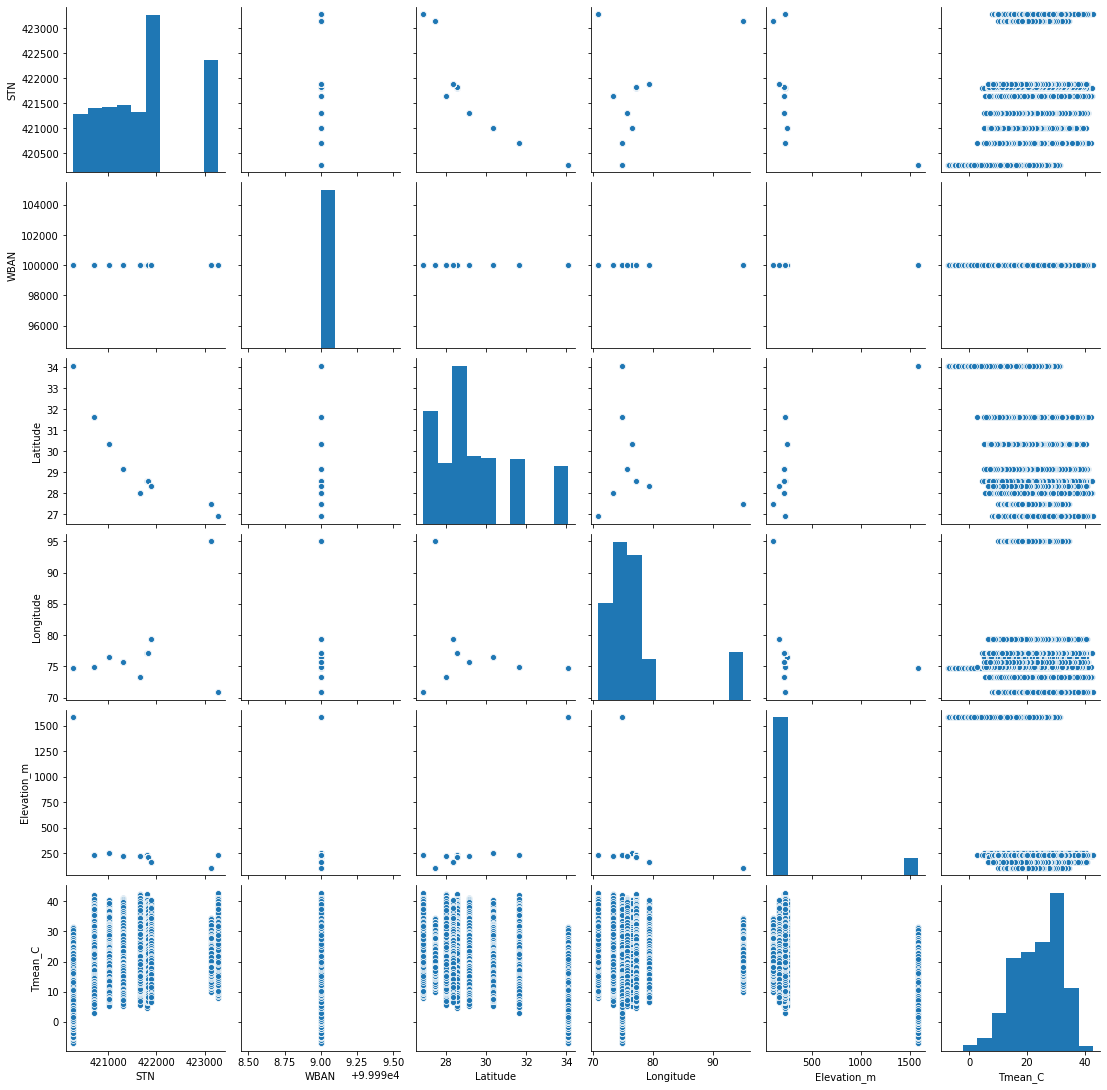

In [ ]:
sns.pairplot(df)

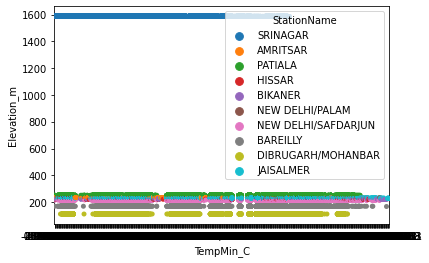

In [ ]:
sns.stripplot(x = 'TempMin_C', y = 'Elevation_m', hue = 'StationName', data = df)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data = df.iloc[:,3:]

In [ ]:
data

,Latitude,Longitude,Elevation_m,RecDate,TempMin_C,Tmean_C,TempMax_C,DewPoint_C,WindSpeed_mps,Rain_mm,WBGTmean,WGBTmax
0,34.083,74.833,1587.0,1/01/1980,0,0.833333,1.999999166,0.500000835,0,11.93799973,0.677000582,1.598000288
1,34.083,74.833,1587.0,2/01/1980,0,0.277778,1.999999166,0.277777791,0,0,0.277777791,1.583110809
2,34.083,74.833,1587.0,3/01/1980,-0.999999583,1.222223,5,-0.999999583,0,8.88999939,0.604333758,3.325000286
3,34.083,74.833,1587.0,4/01/1980,-2.000000238,0.222223,8.000000954,-2.777777672,0,0,-0.514777422,4.999889374
4,34.083,74.833,1587.0,5/01/1980,-2.999999762,-0.388889,6.999999046,-3.222221851,0,0,-1.148222089,4.238111019
...,...,...,...,...,...,...,...,...,...,...,...,...
123744,26.900,70.917,231.0,9/07/2017,26.88888931,33.277779,38.5,23.83333397,3.744602442,0,28.625,31.15233421
123745,26.900,70.917,231.0,10/07/2017,26.61111069,32.000000,39,25.11110878,5.17295599,0,28.52344322,31.90544319
123746,26.900,70.917,231.0,11/07/2017,26.61111069,31.277779,38,24.66666603,6.060851574,0,27.9873333,31.27766609
123747,26.900,70.917,231.0,12/07/2017,27.22222138,31.888889,37,24.33333588,4.786914349,0,28.0996685,30.59033585


In [ ]:
data = data.replace('\\N', np.nan)

In [ ]:
data.dropna(inplace = True)
data.drop(columns = ['RecDate'], inplace = True)

In [ ]:
data.dtypes

Latitude         float64
Longitude        float64
Elevation_m      float64
TempMin_C         object
Tmean_C          float64
TempMax_C         object
DewPoint_C        object
WindSpeed_mps     object
Rain_mm           object
WBGTmean          object
WGBTmax           object
dtype: object

In [ ]:
sc = StandardScaler()
features = sc.fit_transform(data)

In [ ]:
features

array([[ 2.33510338, -0.40767101,  3.08879092, ...,  1.07424221,
        -2.81314602, -3.54769922],
       [ 2.33510338, -0.40767101,  3.08879092, ..., -0.19694985,
        -2.87118389, -3.55007454],
       [ 2.33510338, -0.40767101,  3.08879092, ...,  0.74968249,
        -2.82371011, -3.27219076],
       ...,
       [-1.21271354, -1.04376583, -0.27223826, ..., -0.19694985,
         1.23509049,  1.28724986],
       [-1.21271354, -1.04376583, -0.27223826, ..., -0.19694985,
         1.15715236,  1.18710052],
       [-1.21271354, -1.04376583, -0.27223826, ..., -0.19694985,
         1.17348333,  1.07745066]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data = pca.fit_transform(features)
pca.explained_variance_ratio_

array([0.53914952, 0.14166915])

In [ ]:
data

array([[ 7.77705452, -1.11483493],
       [ 7.88422288, -1.25633867],
       [ 7.63444652, -1.22815792],
       ...,
       [-3.65852411,  0.20110908],
       [-3.63662084,  0.40761049],
       [-3.37950834,  0.2140444 ]])

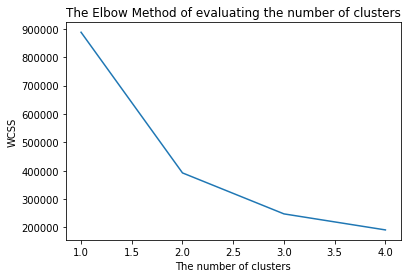

In [ ]:
wcss = list()
from sklearn.cluster import KMeans
for i in range(1,5):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5), wcss)
plt.title("The Elbow Method of evaluating the number of clusters")
plt.xlabel("The number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 0)
y_clus = kmeans.fit_predict(data)

In [ ]:
y_clus

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

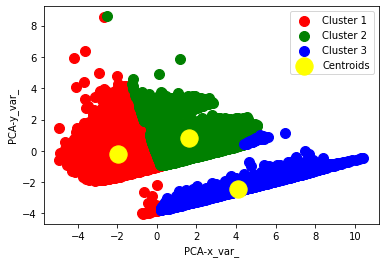

In [ ]:
plt.scatter(data[y_clus == 0, 0], data[y_clus == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_clus == 1, 0], data[y_clus == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(data[y_clus == 2, 0], data[y_clus == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('PCA-x_var_')
plt.ylabel('PCA-y_var_')
plt.legend()
plt.show()